<a href="https://colab.research.google.com/github/jackyhuynh/indeed_jobs_analyst_using_python/blob/main/project_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resume transformation

## Original Resume

![before.PNG](./images/before.PNG)
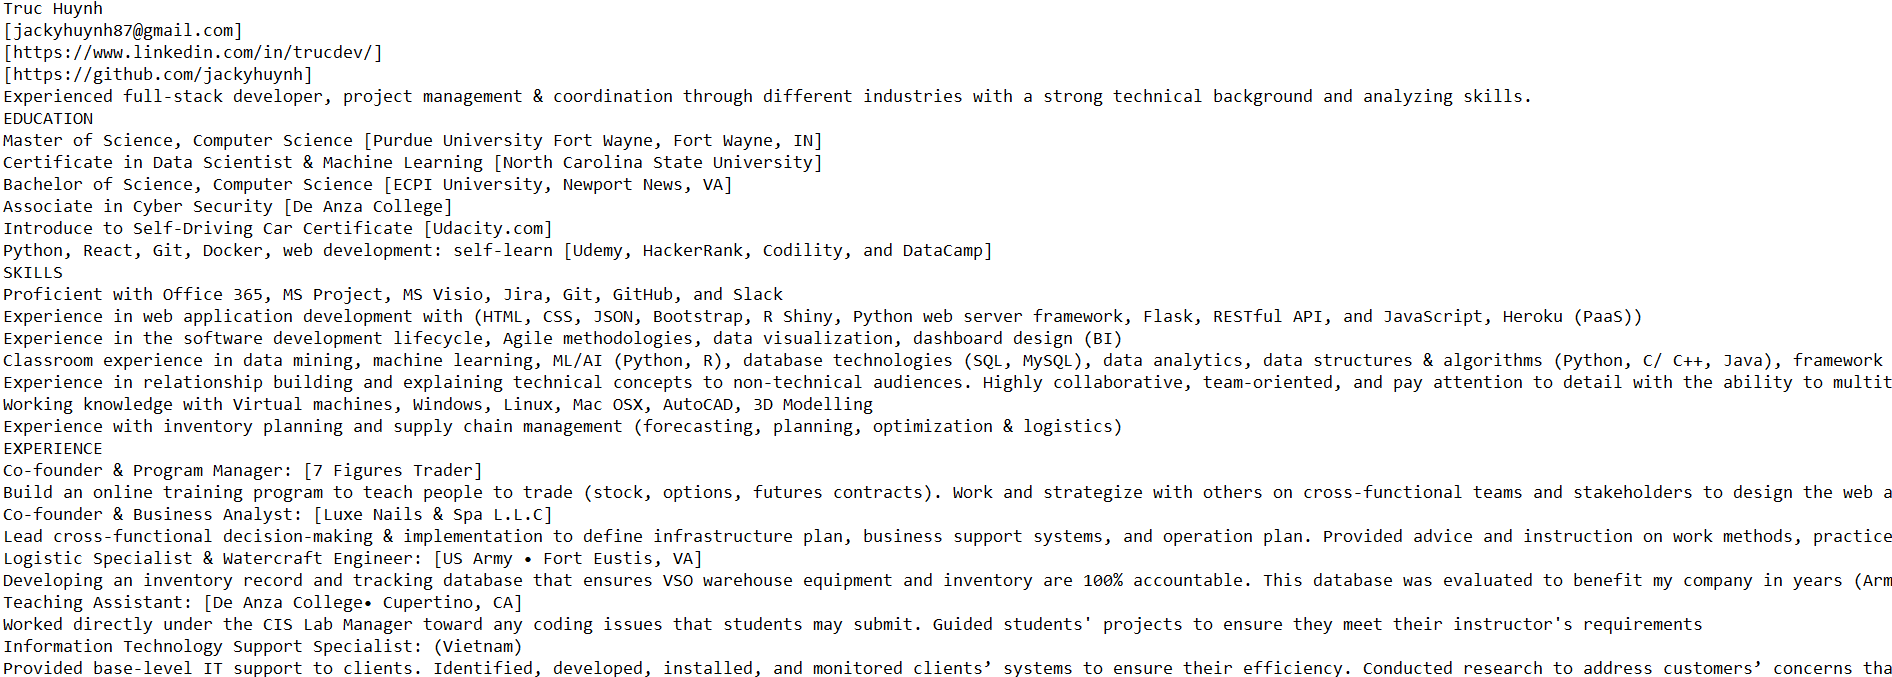

## Transformation Resume:

![final_transformation.PNG](./images/final_transformation.PNG)
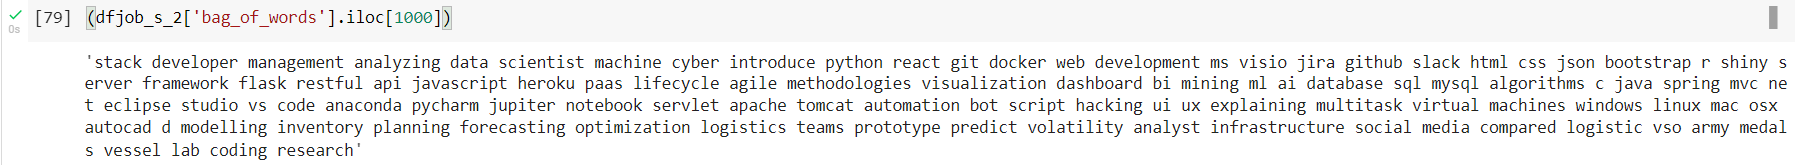

# Report Model I:  POS Tokenization and Keywords Filtering


## Summary:
POS Tokenization and Keywords Filtering aims to filter keywords in the resume and match them with tokenized job_description (after clean up, tidy, token stored in data lake). The matching result is stored in another data frame for further advising and career recommendations.

## Data Tidy:

### Process:
Tidy Data process in the following steps:
- Data Description: quick check of data type, statistic, etc.
- Check missing values
- Evaluate attributes
- Remove unwanted attributes:
    - Drop columns: 'jobid’, 'apply_link’, 'company_link’, 'country’, 'current_url’, 'date_posted’, 'date_posted_parsed’, 'domain’, 'region’, 'srcname’ because they will not relevant to our ML Model
    - Drop rows: where the company name or job title is blank (no point to keep); where company and reviews count is 0

- Fix NA attributes:
    - Change ‘null’: in the ‘benefits’ columns to ‘no benefits’ 
    - Change ‘null’ in the ‘qualifications’ columns to ‘no qualifications’ 
    - Change ‘null’ in the ‘salary_formated’ to ‘neogotiable’
    - Change ‘null’: in the ‘country_code’ to ‘other’
- Tidy Data
    - Remove more than 100,000 rows and 10 columns.

![data_process.PNG](images/data_process.PNG)
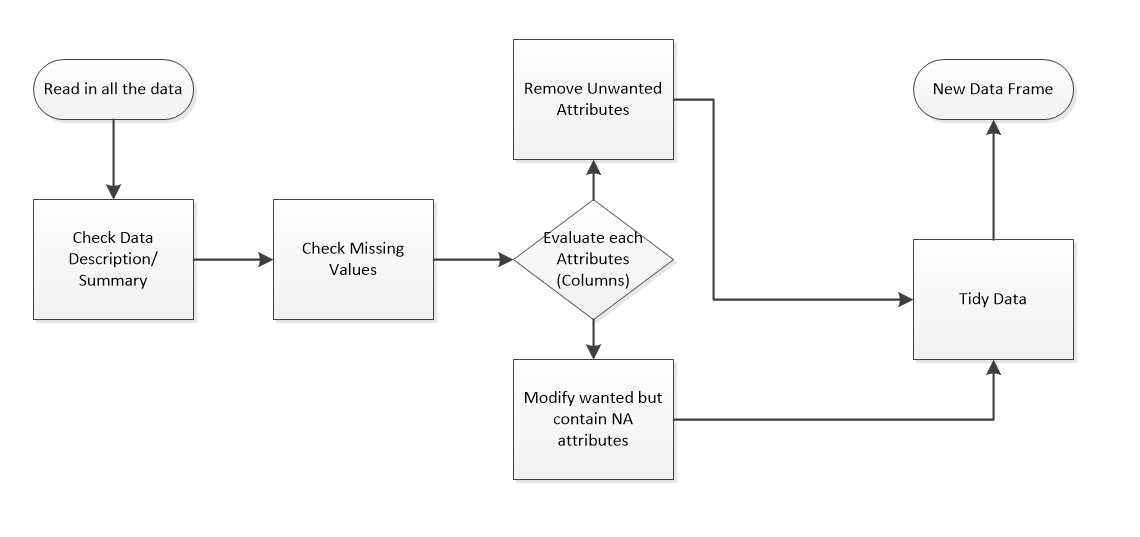

### Data after Tidy Summary:
Name this data tidy version I, we will also use this for our 2nd Model

![data_description_new.PNG](images/data_description_new.PNG)
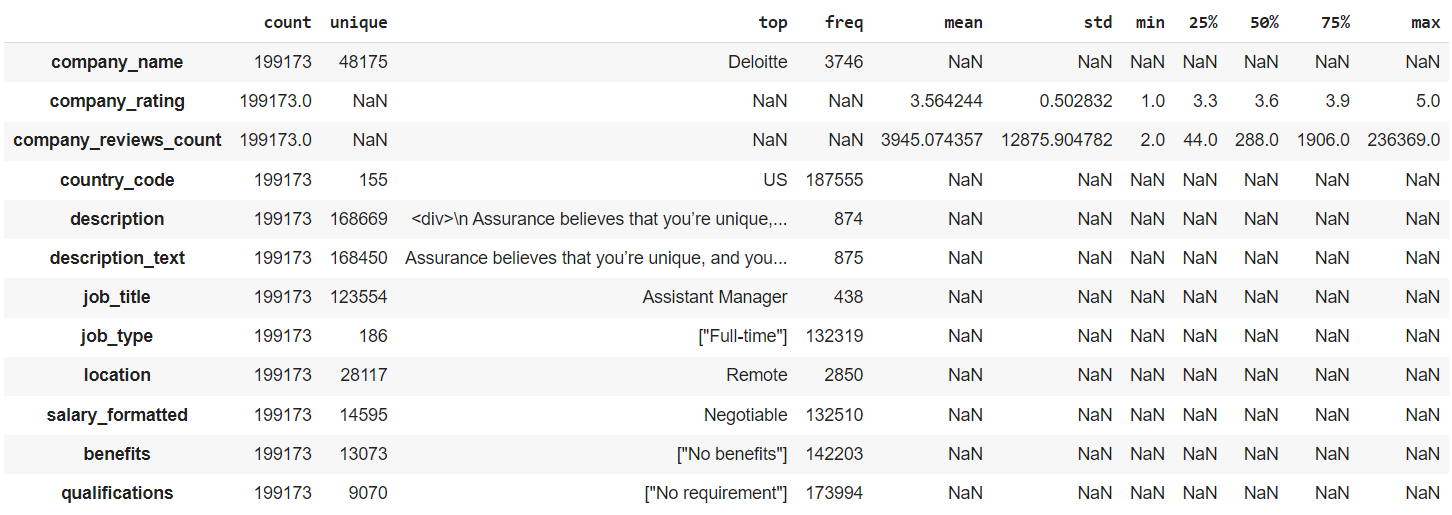

## NLP Processing:
After Data Tidy, and Resume Tidy (Transformation), then NLP will be processed in the following steps:

Streamlining the Job Descriptions using NLP Techniques:
- Step 1: Part of Speech (POS): tagging keywords list (which filter from candidate resume) with indetified tags from NLTK package

![POS.PNG](./images/POS.PNG)

- Step 2: Using the found tags as filter to filter out all the unrelated tags which means the words without these below tags will be removed from job_description 
```
# In this case the list of tags is
include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS'] 
```
- Step 3: Tokenizing the Job Descriptions: parsing the text string into different sections by applying the filter in step 2 (include_tags)
- Step 4: Steaming the words: The stemming process allows computer programs to identify the words of the same stem despite their different look (e.g. “models”, and “modeling” both have the same stem of “model”)
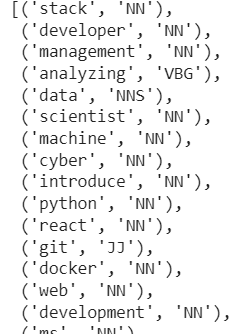

![steamer.PNG](./images/steamer.PNG)
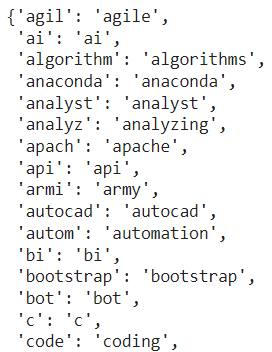

- Step 5:Lowercasing the words
Sample of job description after transformation
![transform.PNG](./images/transform.PNG)
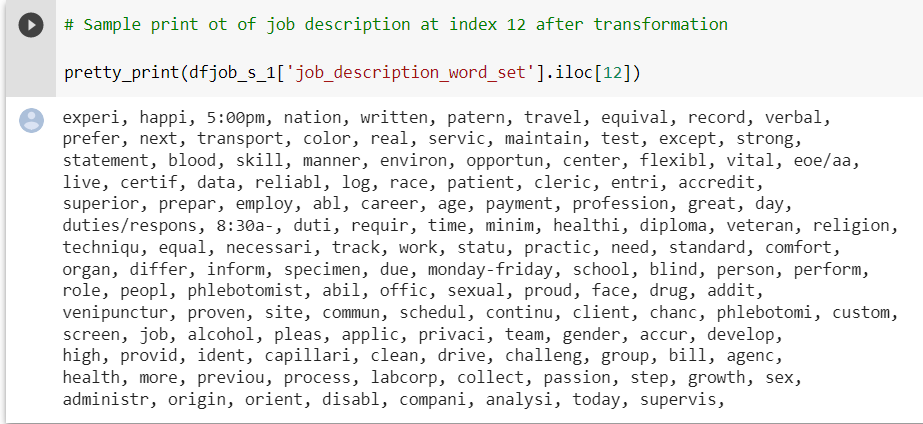

### Run Model & Result
- Using Set (Python Data Structures) to return the similarity of each job compare to the skill set in the resume.The frequency list will be create by the amount of time a words (skill) appear in each job and combine them to caluclate the over all percentage.There is none repeated words (cause we use Set data structure)

![head_df.PNG](./images/head_df.PNG)
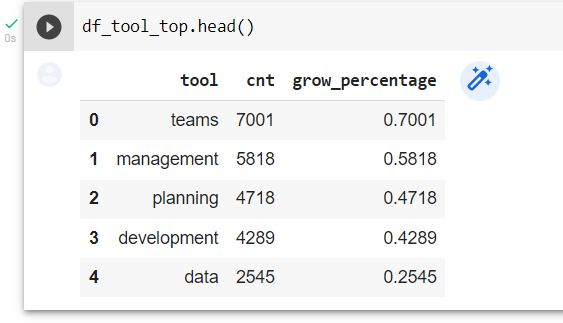

### Data Visualization:

![top_skills.PNG](./images/top_skills.PNG)
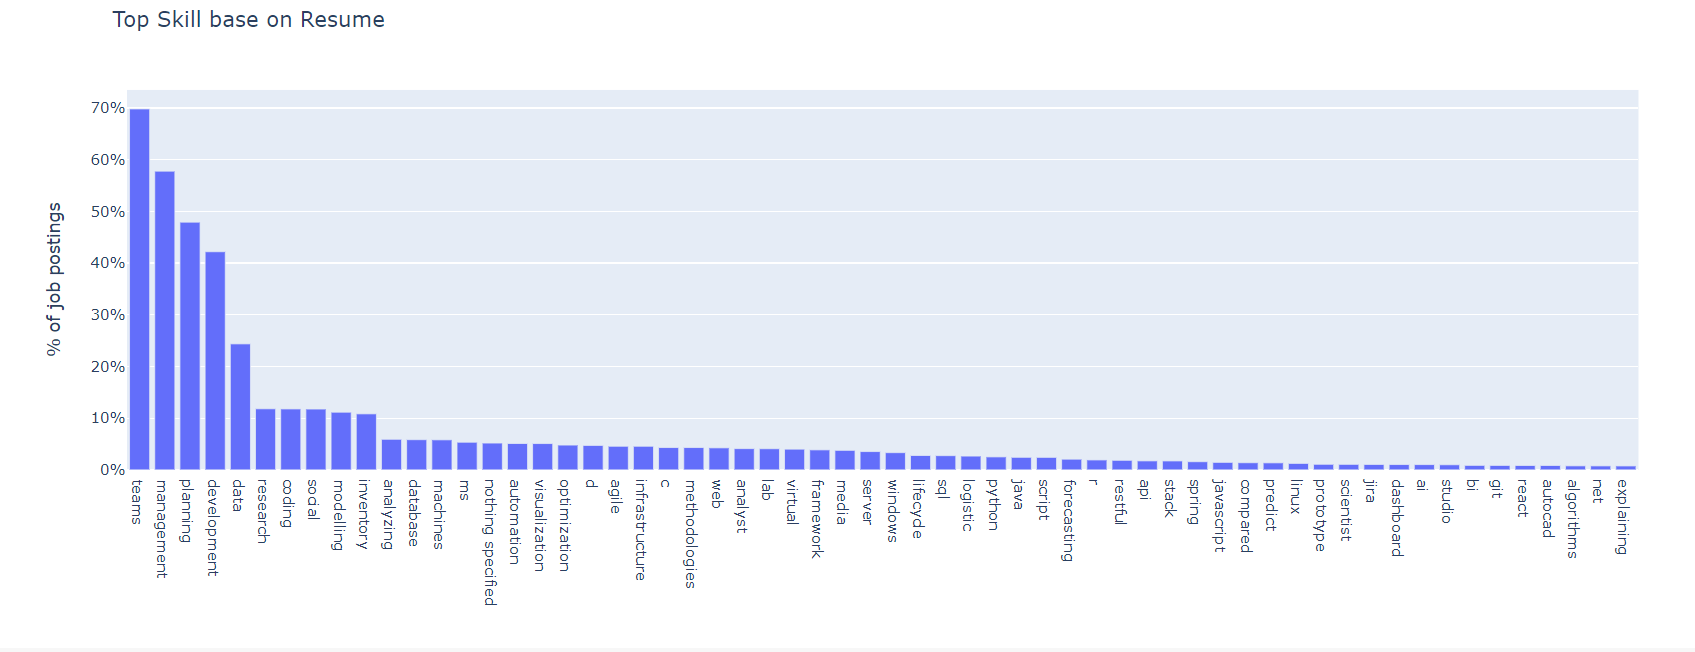

### Deploy application:
- Check Demo [Indeed_Demo](https://www.loom.com/share/c6697fd242464c0ab93923885ab4a6dd)
- App is deployed at Heroku.

# Model 2: Bags of Words and Cosine Similarity

![bags_of_words.PNG](./images/bags_of_words.PNG)
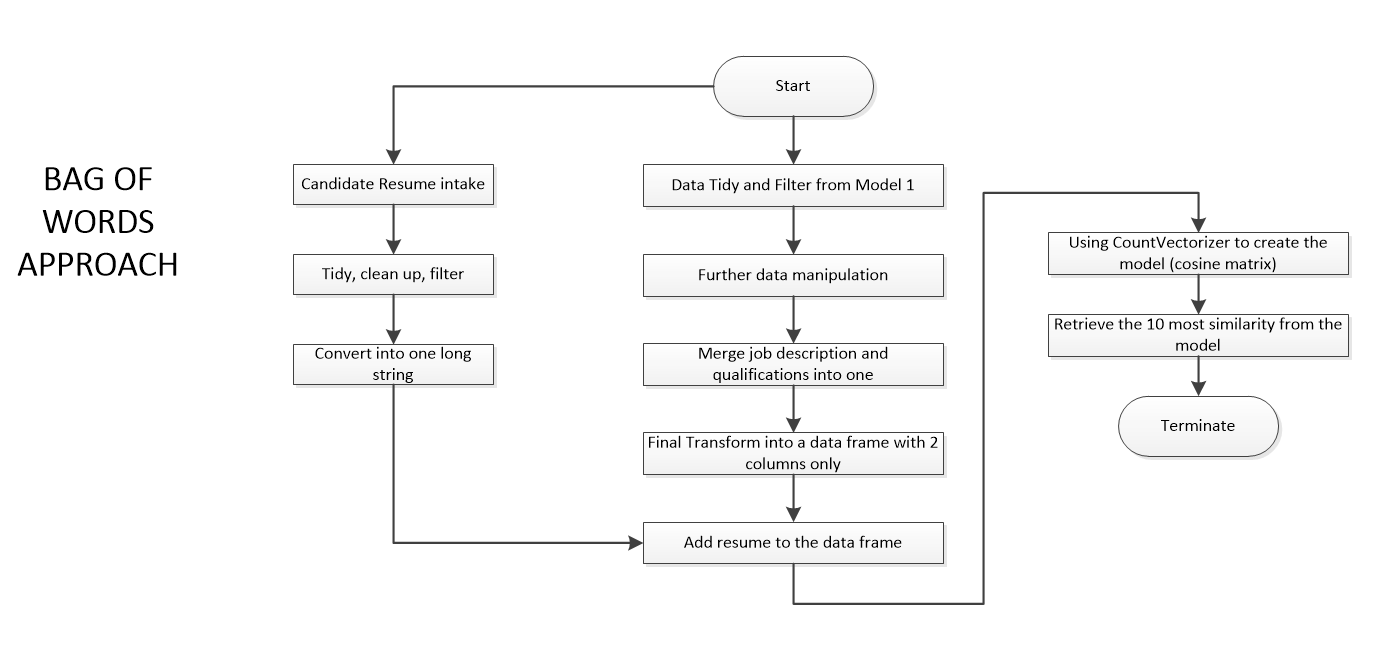


## Summary:
- Bags of Words and Cosine Similarity merge all the columns into two columns. The idea is to merge all the related information to the job search into one column (or attributes) and convert them to vectors using cosine similarity. 
- Measure the distance between resume's vector and all other job description vector using cosine similarity


## Data Tidy:

### NLP Process:
Tidy Data in Model 2 process in the following steps:
- Use the tidy data that create from Model 1 (before any NLP process for Model 1 and keep working)
- Further Data Transformation:
    - Drop columns: 'country_code',  'description', 'job_type', 'salary_formatted', 'benefits’ due to not related to Model 2
- Streamlining the Job Descriptions using NLP Techniques: 
    - Tokenizing the Job Descriptions: parsing the text string into different sections
    - Part of Speech (POS): tagging the job description
- Data Transformation: 
    - Merge 'company_name', 'company_rating', 'company_reviews_count', 'job_title', 'location’ in to one name 'jobs_all_information'
    - Merge the tokenized ‘job_description’ and ‘qualifications’ into one name ‘bag of word’
    


## Final Data Frame Transformation

![data_model2.PNG](./images/data_model2.PNG)
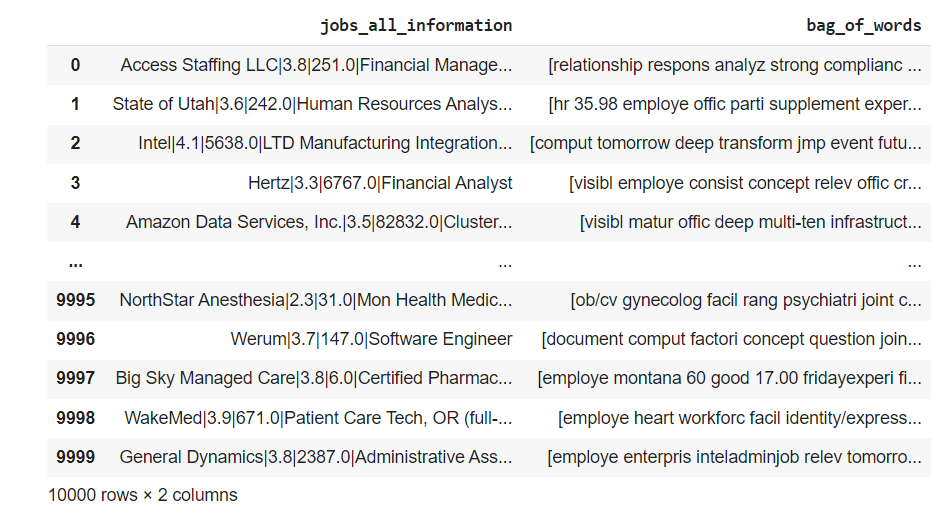

### Create Similarity Matrix:

![similarity_matrix.PNG](./images/similarity_matrix.PNG)
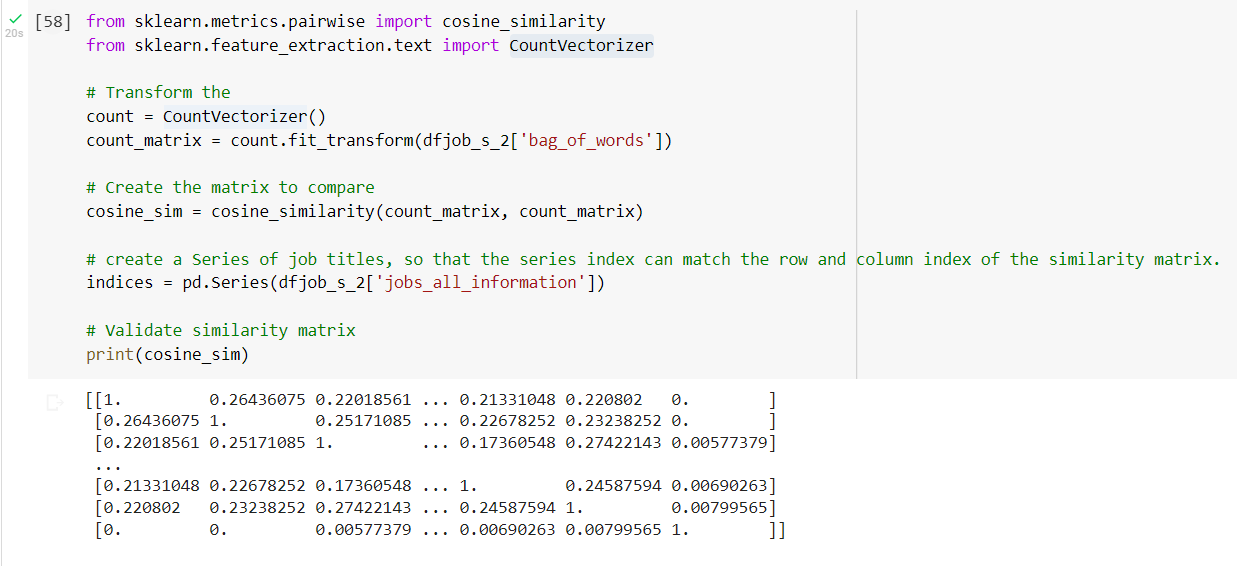

## Result:

![search_result.PNG](./images/search_result.PNG)
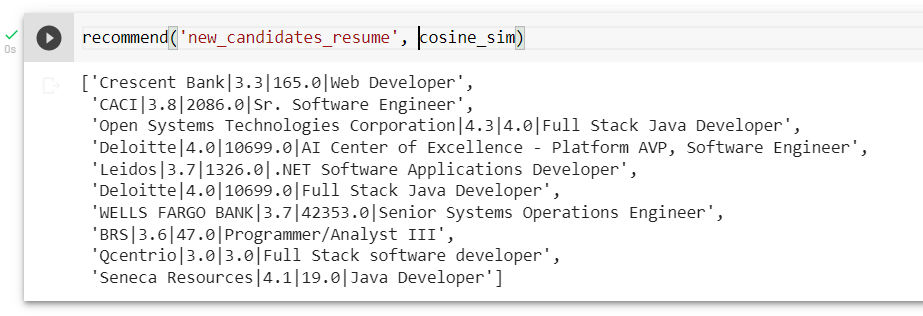